#Machine Learning Guide for Beginners
####Written by Ritvik Prabhu
In this notebook we will go over the necessary skills to understand the concept of Machine Learning and Neural Networks. We will be using TensorFlow and Keras

Let us first import the necessary packages

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from keras import Sequential
from keras.layers import Dense, Activation
%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

##Section 1
####In this section, we will be going over how to use Tensors, build a Linear Regression Model and a simple Neural Network.
###**Tensors** 


Tensors are data-containers that can be of arbitrary dimension, like vectors, scalars and matrices. 

Let's begin by creating a simple tensor:

In [2]:
x = tf.constant(1)
print(x)

tf.Tensor(1, shape=(), dtype=int32)


Here our Tensor contains the value 1, is shapeless and is of data type int32 (32 bit integer).

Let us go ahead and obtain the value of the tensor:

In [4]:
x.numpy()

1

Let's go ahead and creat a simple matrix:

In [6]:
x = tf.constant([[1,2,3],[4,5,6]])
print(x)

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)


Here our Tensor contains the value [1,2,3], [4,5,6] of the shape (2,3) (2 rows and 3 columns) and is of the data type int32

###**Helpers**
Tensor Flow creates a variety of helper functions that for creating Tensors.

Let's create a matrix full of ones:

In [7]:
ones = tf.ones([3,3])
print(ones)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]], shape=(3, 3), dtype=float32)


and zeros

In [9]:
zeros = tf.zeros([2,3])
print(zeros)

tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)


We have 2 rows and 3 columns. If we want to reshape into a 3X2 matrix:

In [11]:
tf.reshape(zeros,[3,2])

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)>

You can also use the transpose function to replace the rows and columns:

In [12]:
tf.transpose(zeros)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)>

###**Tensor Math**
You can perform mathematical operations on your data. 

Let us begin by adding the data:

In [14]:
a = tf.constant(1)
b = tf.constant(3)

tf.add(a,b).numpy()

4

The same thing can be done by:

In [15]:
(a+b).numpy()

4

You can multiply the tensors like so:

In [23]:
c = a*b
print(c.numpy())

3


You can find the sqaure of values by:

In [24]:
print(tf.square(c).numpy())

9


You can find the dot product like so:

In [25]:
d1 = tf.constant([[1, 2], [1, 2]]);
d2 = tf.constant([[3, 4], [3, 4]]);

tf.tensordot(d1, d2, axes=1).numpy()

array([[ 9, 12],
       [ 9, 12]], dtype=int32)

###**Sampling**

TensorFlow allows you to generate random numbers based on various Probability distributions

Let us begin with Normal distribution:

In [31]:
norm = tf.random.normal(shape=(1000, 1), mean=0., stddev=1.)
print(norm[len(norm)-10:])

tf.Tensor(
[[ 1.6442885 ]
 [-0.11626991]
 [ 0.04723465]
 [-0.38755983]
 [ 2.9829893 ]
 [ 0.7960064 ]
 [-0.47163543]
 [-0.23793338]
 [-0.46044332]
 [ 1.8809996 ]], shape=(10, 1), dtype=float32)


Above is the last 10 values of the distribution. Let us now plot it.

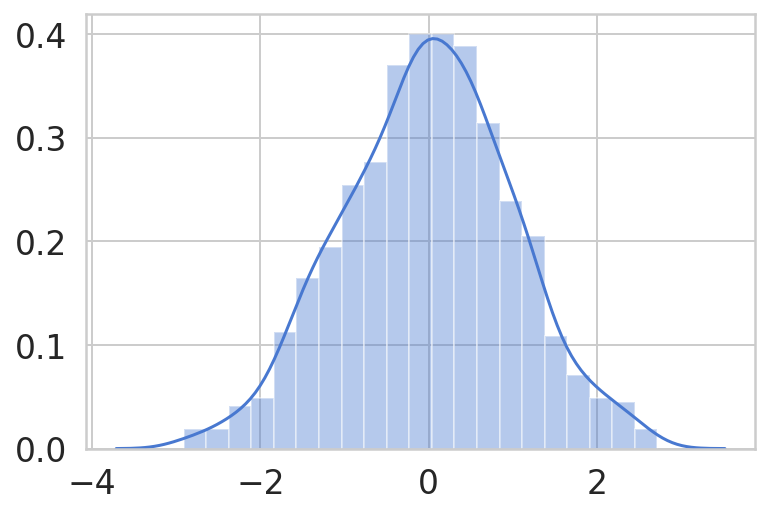

In [29]:
sns.distplot(norm)

Let's do the same thing for Uniform Distribution:

In [32]:
unif = tf.random.uniform(shape=(1000, 1), minval=0, maxval=100)
print(unif[len(unif)-10:])

tf.Tensor(
[[64.90408  ]
 [84.98217  ]
 [ 5.4716587]
 [89.95259  ]
 [ 4.7581553]
 [66.759    ]
 [45.973194 ]
 [98.42657  ]
 [80.20479  ]
 [47.297813 ]], shape=(10, 1), dtype=float32)


Above is the last 10 values of the distribution. Let us now plot it.

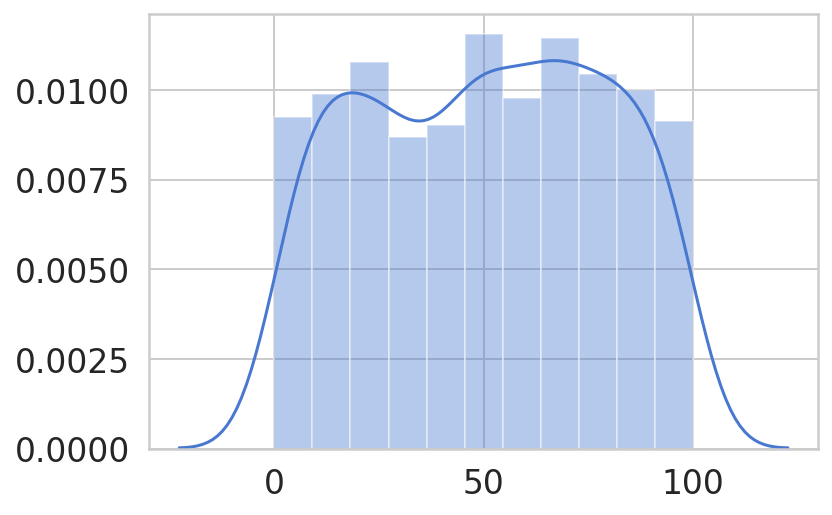

In [35]:
sns.distplot(unif)

The next distribution that we are going to plot is the Poisson distribution. It is popular for modeling
the number of times an event occurs in some time. It contains a hyperparameter  $\lambda$. It controls the number of expected occurrences.

In [36]:
pois = tf.random.poisson(shape=(1000, 1), lam=0.8)
print(pois[len(pois)-10:])

tf.Tensor(
[[0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [2.]
 [0.]
 [0.]], shape=(10, 1), dtype=float32)


Above is the last 10 values of the distribution. Let us now plot it.

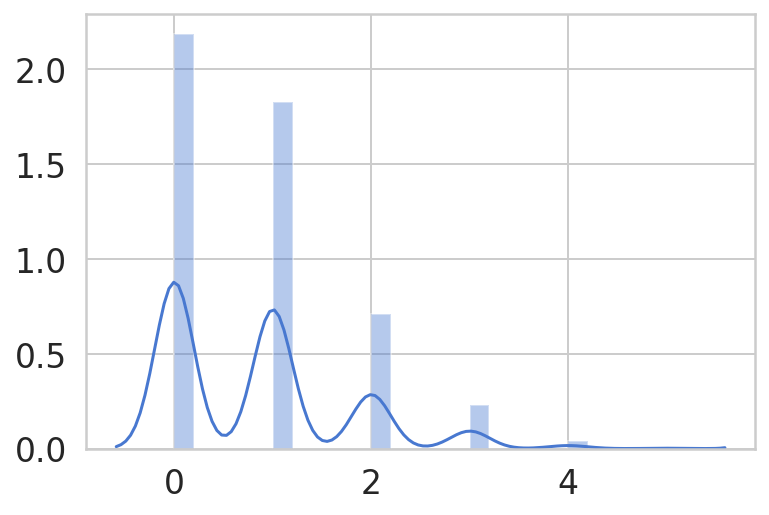

In [37]:
sns.distplot(pois)

The Gamma distribution is continuous. It has 2 hyperparameters that control the shape and scale.
It is used to model always positive continuous variables with skewed distributions.

In [38]:
gam = tf.random.gamma(shape=(1000, 1), alpha=0.8)
print(gam[len(gam)-10:])

tf.Tensor(
[[0.49950927]
 [0.29502657]
 [5.7953157 ]
 [0.36630097]
 [0.6541817 ]
 [0.03227872]
 [0.57958424]
 [0.91863984]
 [0.06824369]
 [2.8883734 ]], shape=(10, 1), dtype=float32)


Above is the last 10 values of the distribution. Let us now plot it.

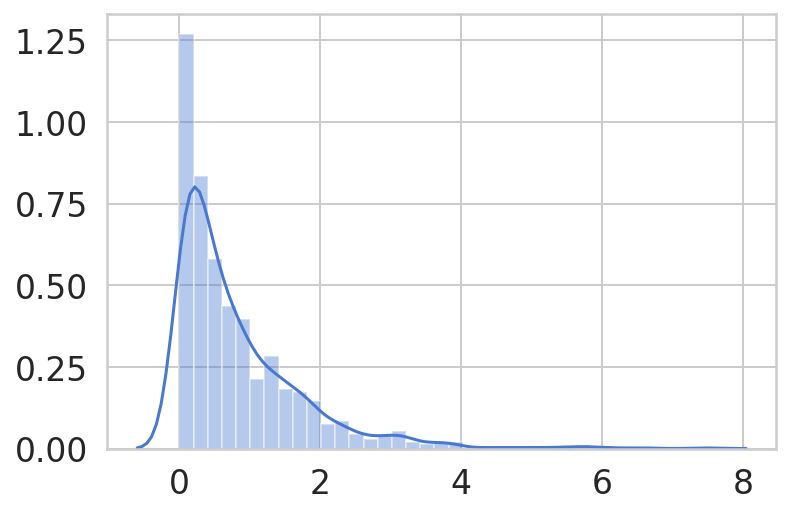

In [39]:
sns.distplot(gam)

###**Linear Regression**
Let is build a simple linear regression model to determine the stopping distance of a car based on their speed. All of the information is retrieved from the [dataset](https://vincentarelbundock.github.io/Rdatasets/datasets.html).

In [0]:
data = tf.constant([
  [4,2],
  [4,10],
  [7,4],
  [7,22],
  [8,16],
  [9,10],
  [10,18],
  [10,26],
  [10,34],
  [11,17],
  [11,28],
  [12,14],
  [12,20],
  [12,24],
  [12,28],
  [13,26],
  [13,34],
  [13,34],
  [13,46],
  [14,26],
  [14,36],
  [14,60],
  [14,80],
  [15,20],
  [15,26],
  [15,54],
  [16,32],
  [16,40],
  [17,32],
  [17,40],
  [17,50],
  [18,42],
  [18,56],
  [18,76],
  [18,84],
  [19,36],
  [19,46],
  [19,68],
  [20,32],
  [20,48],
  [20,52],
  [20,56],
  [20,64],
  [22,66],
  [23,54],
  [24,70],
  [24,92],
  [24,93],
  [24,120],
  [25,85]
])

We can extract each column using slicing

In [0]:
speed = data[:, 0]
stopping_distance = data[:, 1]

Let's now have a look at the data:

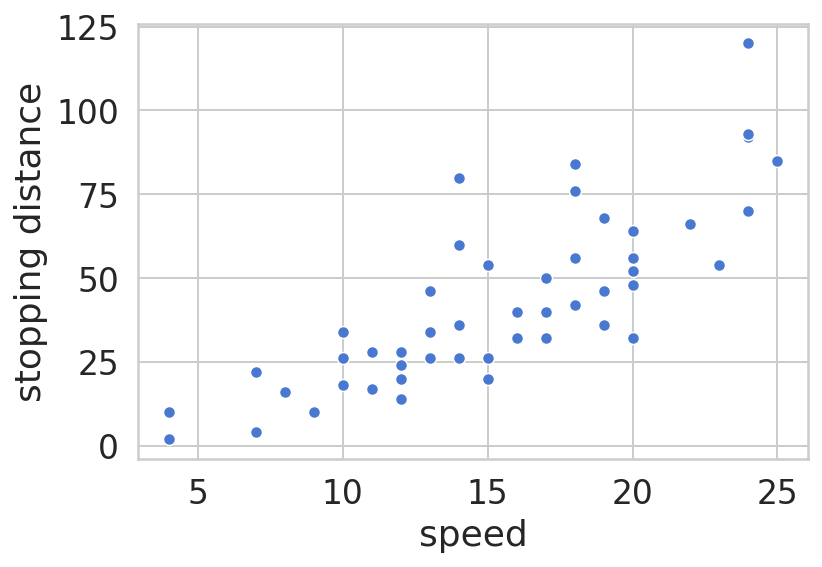

In [42]:
sns.scatterplot(speed, stopping_distance);
plt.xlabel("speed")
plt.ylabel("stopping distance");

A linear model seems to be able to do the job here. A Simple Linear Regression finds a straight line that can be used to extrapolate or interpolate based on a single predictor/feature.

In [0]:
lin_reg = keras.Sequential([
  layers.Dense(1, activation='linear', input_shape=[1]),
])
optimizer = tf.keras.optimizers.RMSprop(0.001)
lin_reg.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mse'])

In [0]:
history = lin_reg.fit(
  x=speed,
  y=stopping_distance,
  shuffle=True,
  epochs=1000,
  validation_split=0.2,
  verbose=0
)

In [0]:
def plot_error(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
            label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
            label = 'Val Error')

  plt.legend()
  plt.show()

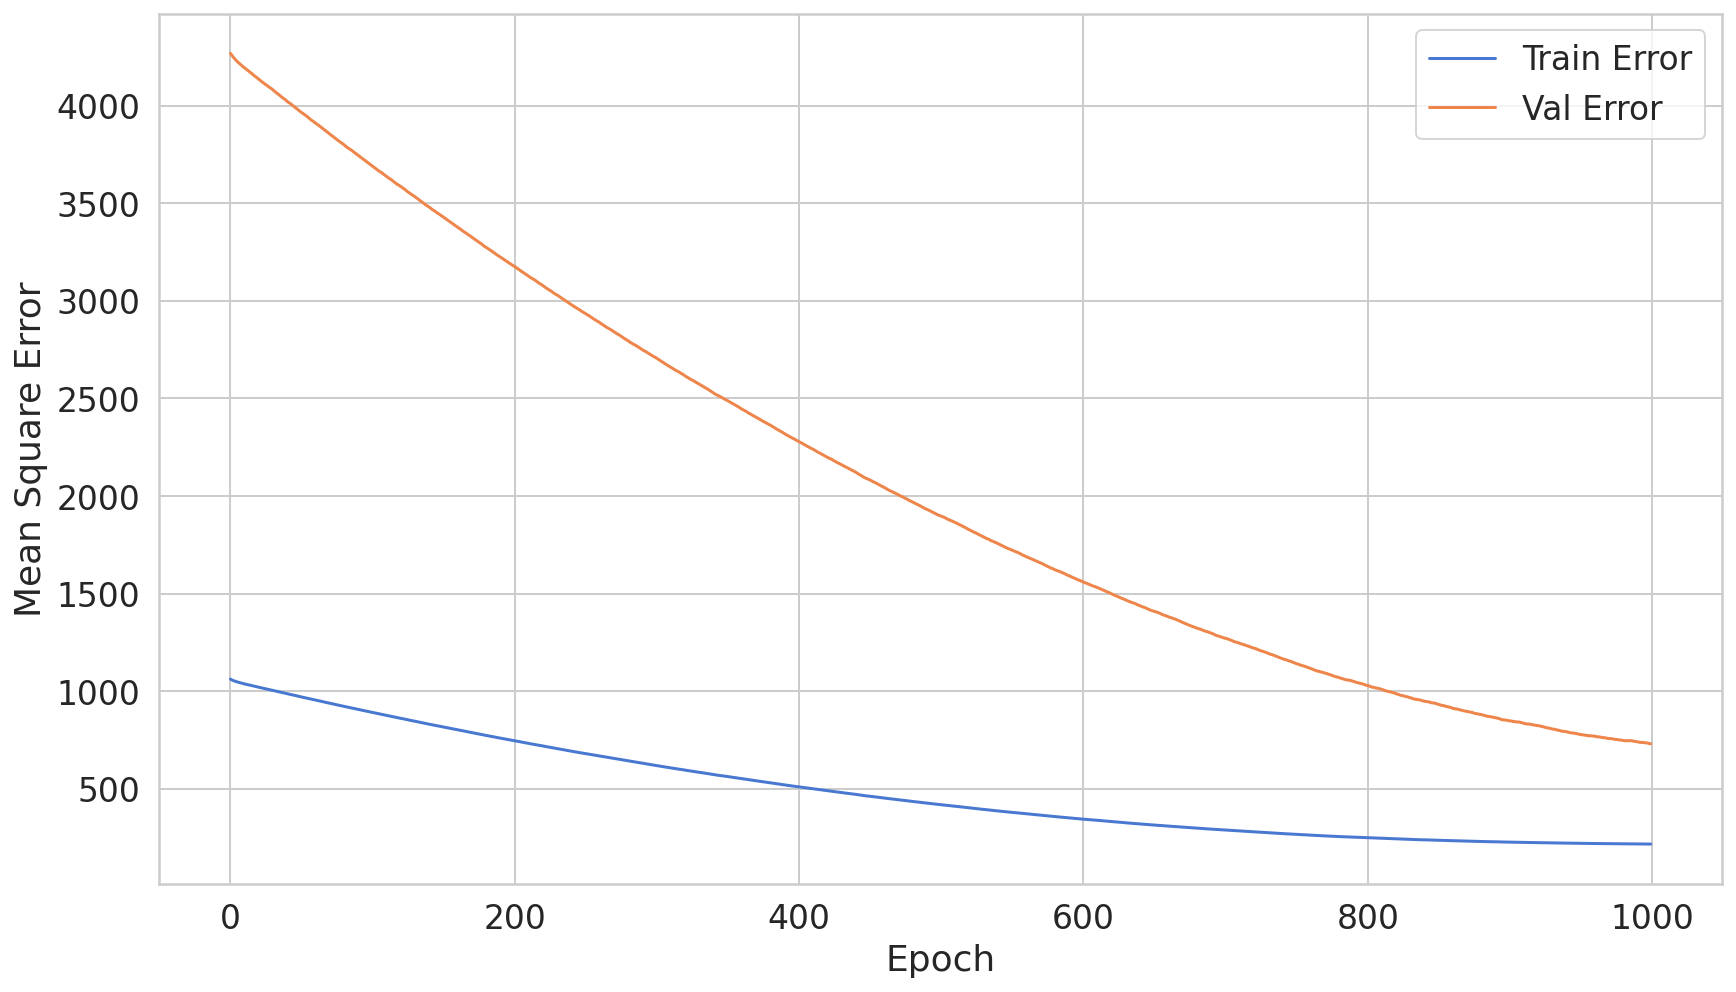

In [60]:
plot_error(history)

In [61]:
lin_reg.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
weights = lin_reg.get_layer("dense_1").get_weights()
intercept = weights[0][0][0]
slope = weights[1][0]

In [66]:
slope

1.7539631

###References:
Books:

Valkov, V. (2020). Hacker's Guide to Machine Learning. Retrieved from https://leanpub.com/Hackers-Guide-to-Machine-Learning-with-Python

Datasets:

Linear Regression: https://vincentarelbundock.github.io/Rdatasets/datasets.html